In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
def rmse(p,a):
    difference=p-a
    squared=difference**2
    mean=squared.mean()
    score=np.sqrt(mean)
    return score

In [3]:
rmse_scorer=make_scorer(rmse, greater_is_better=False)
rmse_scorer

make_scorer(rmse, greater_is_better=False)

In [4]:
cen=pd.read_csv('C:/Users/user/Desktop/안동/cen with month.csv',encoding='euc-kr')

In [5]:
cen_21=pd.read_csv('C:/Users/user/Desktop/안동/cen21 with month.csv',encoding='euc-kr')

In [6]:
cen=cen.drop(['Unnamed: 0','date'],axis=1)
cen_21=cen_21.drop(['Unnamed: 0','date'],axis=1)
cen

,종류,건수,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2),month
0,곡물정선기,0.0,-0.5,0.0,2.0,54.0,7.92,1
1,곡물정선기,0.0,-2.1,0.0,1.9,36.9,11.01,1
2,곡물정선기,0.0,-2.5,0.0,0.7,46.8,9.85,1
3,곡물정선기,0.0,-0.6,0.0,1.8,47.4,9.81,1
4,곡물정선기,0.0,-1.2,0.0,1.8,46.6,11.11,1
...,...,...,...,...,...,...,...,...
48175,휴립피복기,0.0,0.3,0.0,0.6,82.1,5.00,12
48176,휴립피복기,0.0,1.8,0.0,0.5,76.1,0.00,12
48177,휴립피복기,0.0,1.3,0.2,1.3,76.1,6.29,12
48178,휴립피복기,0.0,-7.8,0.0,4.6,39.1,11.27,12


In [7]:
dt_index = pd.date_range(start='20210101', end='20211220')
dt_list = dt_index.strftime("%Y-%m-%d").tolist()

In [8]:
cong_cen=cen[cen['종류']=='콩정선기']
cong_cen21=cen_21[cen_21['종류']=='콩정선기']
cong_cen

,종류,건수,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2),month
39420,콩정선기,0.0,-0.5,0.0,2.0,54.0,7.92,1
39421,콩정선기,0.0,-2.1,0.0,1.9,36.9,11.01,1
39422,콩정선기,0.0,-2.5,0.0,0.7,46.8,9.85,1
39423,콩정선기,0.0,-0.6,0.0,1.8,47.4,9.81,1
39424,콩정선기,0.0,-1.2,0.0,1.8,46.6,11.11,1
...,...,...,...,...,...,...,...,...
40510,콩정선기,0.0,0.3,0.0,0.6,82.1,5.00,12
40511,콩정선기,1.0,1.8,0.0,0.5,76.1,0.00,12
40512,콩정선기,3.0,1.3,0.2,1.3,76.1,6.29,12
40513,콩정선기,1.0,-7.8,0.0,4.6,39.1,11.27,12


In [10]:
scaler=MinMaxScaler()

In [11]:
minmax_cong = pd.DataFrame(scaler.fit_transform(cong_cen.iloc[:,1:]))
minmax_cong.columns=['건수','평균기온','일강수량','평균풍속','평균상대습도','합계일사량','month']
minmax_cong21 = pd.DataFrame(scaler.fit_transform(cong_cen21.iloc[:,1:]))
minmax_cong21.columns=['건수','평균기온','일강수량','평균풍속','평균상대습도','합계일사량','month']

In [12]:
train_x=minmax_cong.drop('건수',axis=1)
train_y=minmax_cong['건수']
test_x=minmax_cong21.drop('건수',axis=1)
test_y=minmax_cong21['건수']

In [13]:
train_x

,평균기온,일강수량,평균풍속,평균상대습도,합계일사량,month
0,0.254587,0.00000,0.36,0.402597,0.253197,0.0
1,0.217890,0.00000,0.34,0.180519,0.351982,0.0
2,0.208716,0.00000,0.10,0.309091,0.314898,0.0
3,0.252294,0.00000,0.32,0.316883,0.313619,0.0
4,0.238532,0.00000,0.32,0.306494,0.355179,0.0
...,...,...,...,...,...,...
1090,0.272936,0.00000,0.08,0.767532,0.159847,1.0
1091,0.307339,0.00000,0.06,0.689610,0.000000,1.0
1092,0.295872,0.00203,0.22,0.689610,0.201087,1.0
1093,0.087156,0.00000,0.88,0.209091,0.360294,1.0


In [14]:
test_x

,평균기온,일강수량,평균풍속,평균상대습도,합계일사량,month
0,0.195652,0.0,0.369565,0.466967,0.241767,0.0
1,0.210145,0.0,0.391304,0.328829,0.307245,0.0
2,0.212560,0.0,0.586957,0.114114,0.307245,0.0
3,0.212560,0.0,0.065217,0.319820,0.233243,0.0
4,0.231884,0.0,0.391304,0.214715,0.233243,0.0
...,...,...,...,...,...,...
349,0.405797,0.0,0.086957,0.680180,0.033708,1.0
350,0.268116,0.0,1.000000,0.111111,0.228981,1.0
351,0.161836,0.0,0.260870,0.201201,0.272375,1.0
352,0.287440,0.0,0.478261,0.348348,0.272375,1.0


In [16]:
parameters={
    'max_depth':[1,3,5,7,9,10],
    'max_features':[0.1,0.3,0.5,0.7,0.9,1],
    }
model=RandomForestRegressor()
GS=GridSearchCV(model, param_grid=parameters, cv=5, scoring=rmse_scorer)
GS.fit(train_x,train_y)
print('Best_params:',GS.best_params_)


Best_params: {'max_depth': 5, 'max_features': 0.5}


In [19]:
model1=RandomForestRegressor(n_estimators=100,max_depth=GS.best_params_['max_depth'],
                             max_features=GS.best_params_['max_features'],n_jobs=-1,random_state=7)
model1=model1.fit(train_x,train_y)
df_importance=pd.DataFrame({'feature':train_x.columns,
                        'importance':model1.feature_importances_})
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,month,0.554351
0,평균기온,0.166695
4,합계일사량,0.116843
3,평균상대습도,0.091374
2,평균풍속,0.057694
1,일강수량,0.013043


In [22]:
y_pred=model1.predict(test_x)
print('MSE:',mean_squared_error(test_y,y_pred))

MSE: 0.015137202929045886


In [31]:
cong_pred=pd.DataFrame({'date' : dt_list,'실제값':test_y,'예측값':y_pred})
cong_pred

,date,실제값,예측값
0,2021-01-01,0.000000,0.017646
1,2021-01-02,0.000000,0.026591
2,2021-01-03,0.000000,0.029928
3,2021-01-04,0.000000,0.015948
4,2021-01-05,0.000000,0.018815
...,...,...,...
349,2021-12-16,0.454545,0.174002
350,2021-12-17,0.181818,0.375228
351,2021-12-18,0.000000,0.202092
352,2021-12-19,0.000000,0.327938


In [32]:
plt.rc("font",family='Malgun Gothic')
sns.set(font='Malgun Gothic',
       rc={'axes.unicode_minus':False},
       style='white')

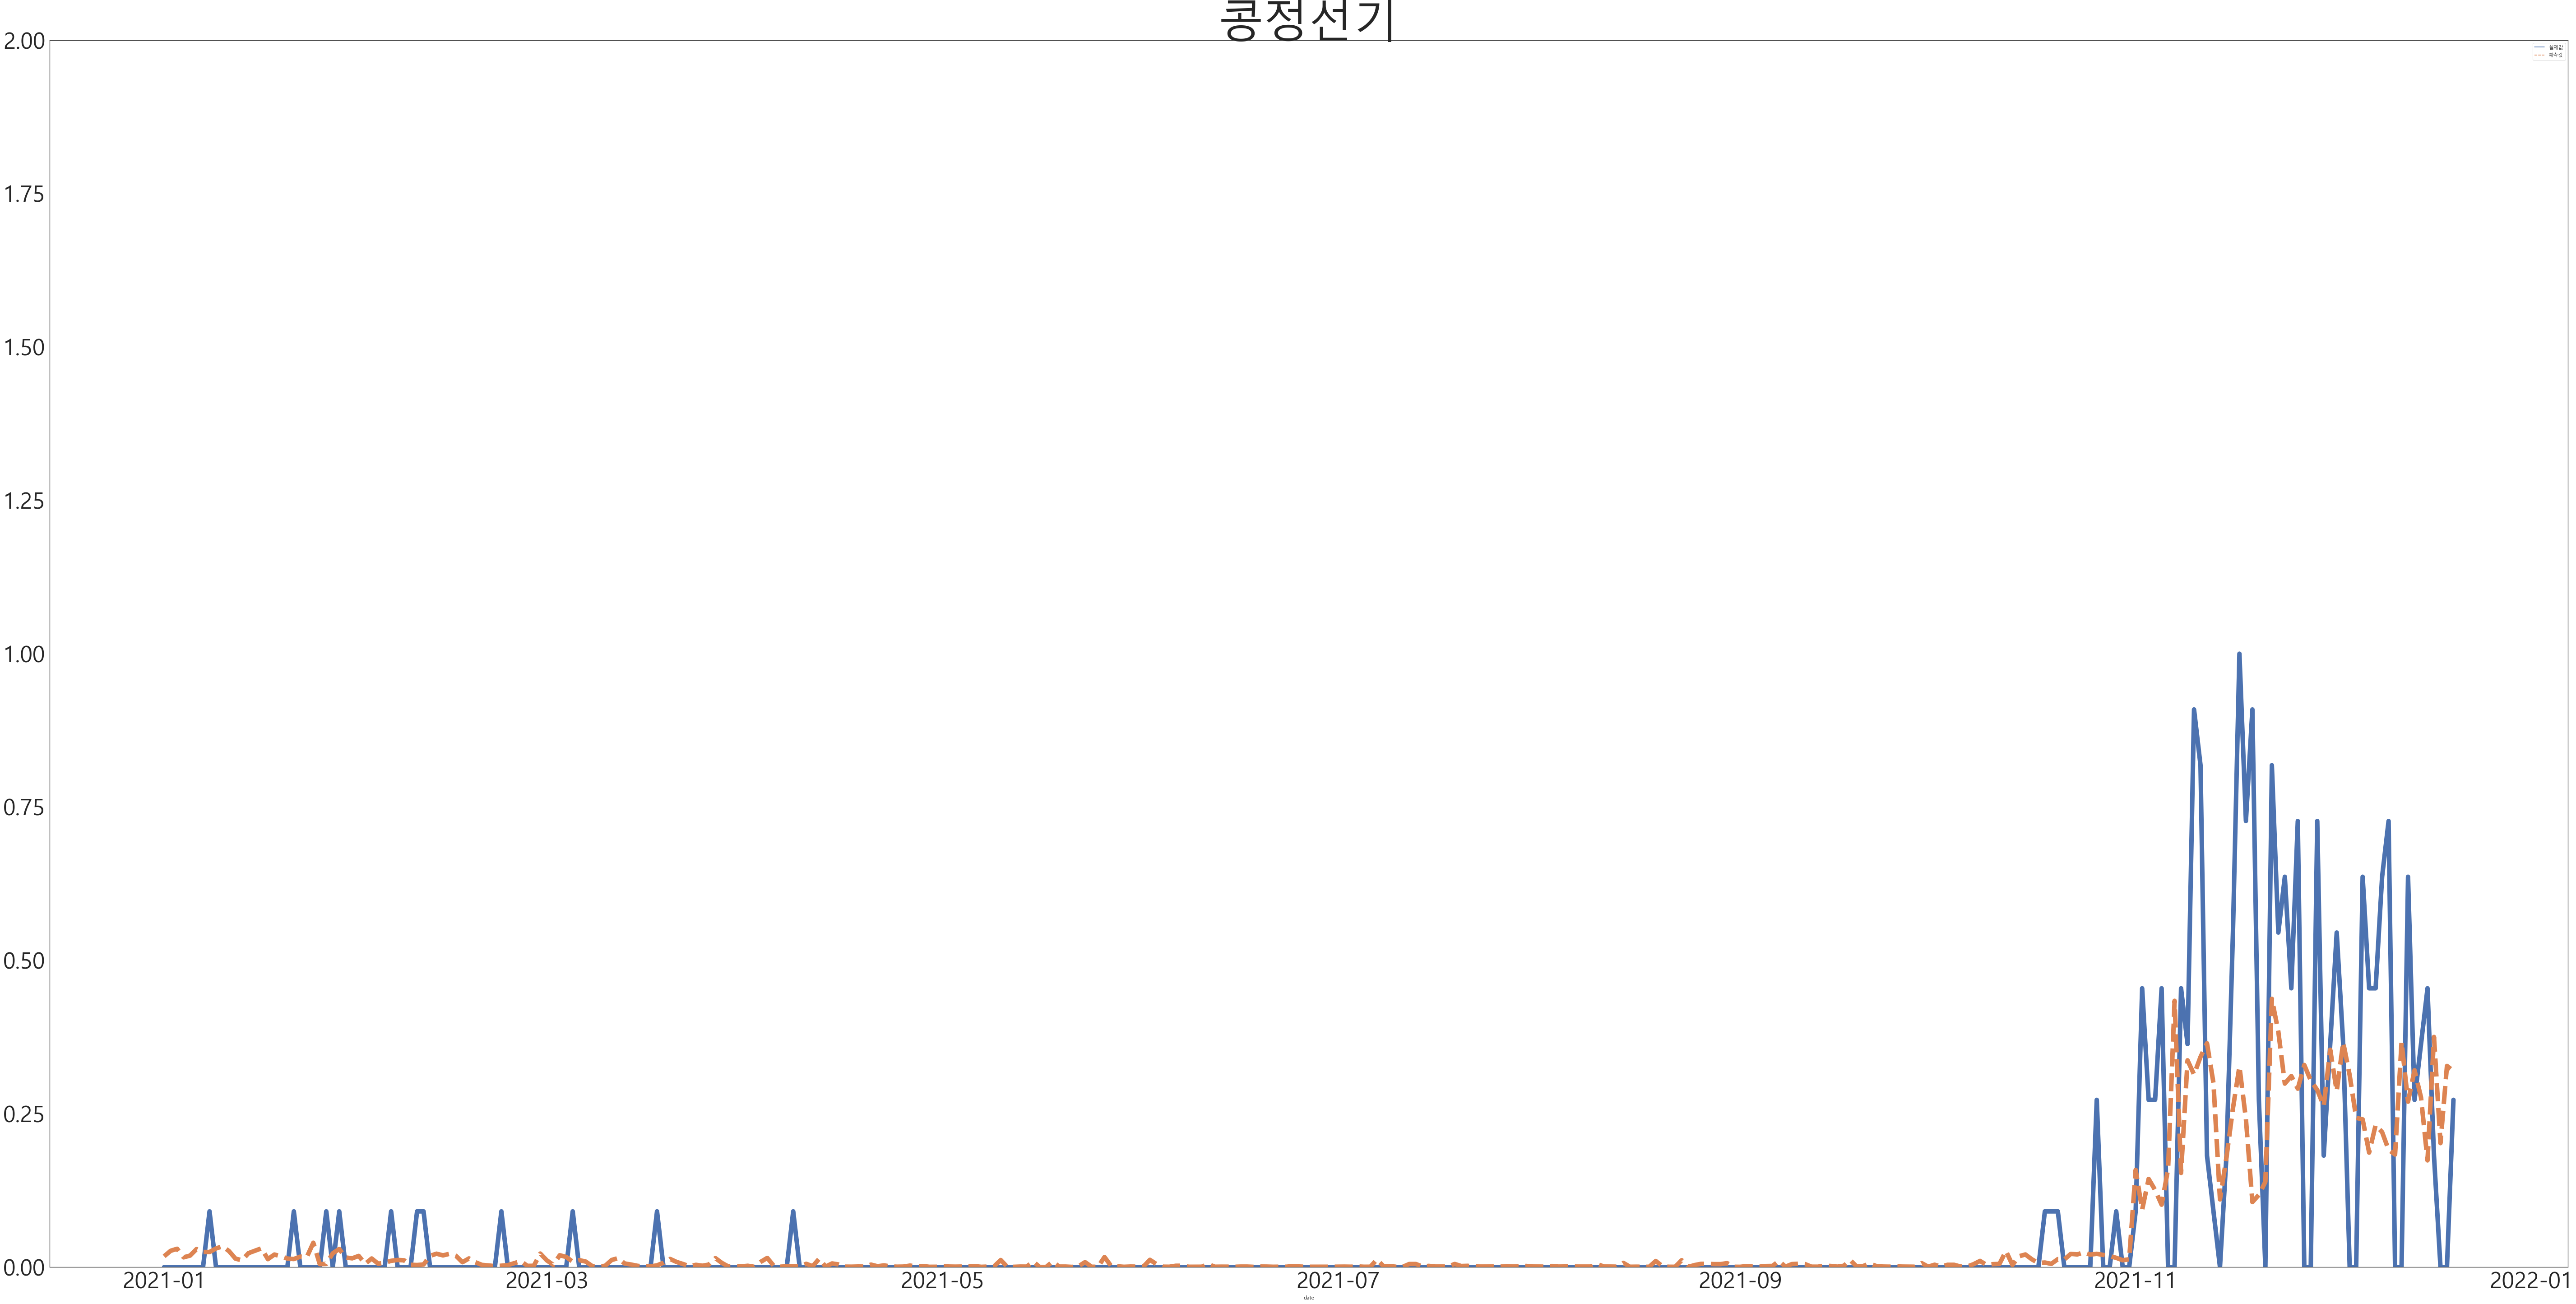

In [33]:
fig, ax = plt.subplots(figsize=(100,50))
cong_pred['date']=pd.to_datetime(cong_pred['date'])
cong_pred=cong_pred.set_index('date')
sns.lineplot(data=cong_pred,linewidth=10)
ax.set( ylim = (0, 2) )
plt.xticks( fontsize=50)
plt.yticks(fontsize=50)
plt.title('콩정선기',size=100)
plt.show()